# 3. RandomCandyMachines - Strategies learning from previous tries, exploration-exploitation tradeoff definition

## I. Introduction

### I.1. About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (10/04/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)
- Pandas
- Tqdm

### I.2. Imports and required libraries

This notebook and the RandomCandyMachines files rely on the following libraries:
- Matplotlib (for graphical display of performance graphs)
- Numpy (for array operations)
- Pandas (for displaying tables, listing the parameters of the game)
- Tqdm (for displaying waitbar and progression bars)

We will also import the custom functions and classes from, using the following imports.

In [1]:
from RandomCandyMachineGame import *
from MonteCarloRCM import *

### I.3. Fixing seeds for reproducibility

For reproducibility, we will fix the random seeds of the numpy random variables, as shown below.

In [2]:
from numpy.random import seed as np_seed
random_seed = 8
np_seed(random_seed)

## II. For reference, the naive random and prior knowledge strategies

In this notebook, we will investigate strategies that attempt to learn which machine to play, and will compare the performance of these strategies to two reference strategies we introduced in the previous notebook, namely:
- the **'prior knowledge'** strategy, which defines the upper performance bound;
- and the **'random_naive'**, which defines a lower performance bound, if we play naively by randomly selecting machines to play.

The parameters of the game are listed below:
- 10000 coins to play.
- 1 deterministic machine and 5 random machines.
- The cost of the machines is constant and fixed to 1.
- Deterministic machines always return 1 candy.
- Random machines return either 2 candies or 0.

In [3]:
playable_money = 10000
number_of_deterministic_machines = 1
number_of_random_machines = 5
machines_cost = 1
return_prices_for_deterministic_machines = 1
return_prices_for_random_machines_win = 2
return_prices_for_random_machines_loss = 0

We then run an iteration of the CandyMachineGame, with said parameters and given random seed, for both reference strategies and store their performance (in terms of outcomes and regrets) for later reuse, as show in the two cells below.

In [4]:
# Initialize a CandyMachineGame, with PriorKnowledgeAgent
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'prior_knowledge', \
                       random_seed = random_seed)
# Play
cmg.play()

Playing 10000 coins with agent prior_knowledge: 100%|██████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 238468.54it/s]


In [5]:
# Store average performance and regret
prior_knowledge_avg = cmg.agent.compute_agent_outcome()/playable_money
print(prior_knowledge_avg)
prior_knowledge_avg_reg = cmg.agent.compute_agent_regret()/playable_money
print(prior_knowledge_avg_reg)

1.9372
-0.00011867435813613893


In [6]:
# Initialize a CandyMachineGame, with RandomNaiveAgent
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'random_naive', \
                       random_seed = random_seed)
# Play
cmg.play()

Playing 10000 coins with agent random: 100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 130268.41it/s]


In [7]:
# Store average performance and regret
random_naive_avg = cmg.agent.compute_agent_outcome()/playable_money
print(random_naive_avg)
random_naive_avg_reg = cmg.agent.compute_agent_regret()/playable_money
print(random_naive_avg_reg)

1.3259
0.6111813256418831


## III. Our first Exploration/Exploitation based strategy: the epsilon first strategies.



### III.1. The epsilon first naive random strategy

In the epsilon first strategies, we propose to use *epsilon_value* of the playable coins to try the machines and guess what their expected return might be. Here we fixed *epsilon_value* to 0.2, meaning that 20% of the 10000 coins (i.e. 2000 coins) will be used to try the machines and guess what their expected return might be. This is called the **exploration** phase, as we are simply trying out the machines to check which one might be the best to play.

In [8]:
epsilon_value = 0.2

In the **'epsilon_first_naive'** strategy, we randomly split these 2000 coins over the 6 available machines to try and guess what their expected return might be. After all 2000 coins have been used, the estimated return for machine $ i $ is simply defined as the mean of the outcomes obtained on this machine, divided by the amount of coins spent on said machine.

After these 2000 coins have been used, we use the remaining 8000 coins on the machine with the highest estimated reward. This is the **exploitation** phase, where we capitalize on the knowledge we have acquired during the **exploration** phase.

In this section, we will demonstrate how this strategy works, and as usual, it starts with creating an instance of a CandyMachineGame with **'epsilon_first_naive'** as the strategy to be used.

In [9]:
# Initialize a CandyMachineGame, with EpsilonFirstNaive
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_first_naive', \
                       agent_parameters = epsilon_value, \
                       random_seed = random_seed)

As before, we play the game with this strategy using the *play()* method.

In [10]:
cmg.play()

Playing 10000 coins with agent epsilon_first: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 167039.19it/s]


As shown in the history below, the agent plays machines randomly on the first iterations (which corresponds to the **exploration** phase) and later on ends up playing only on machine 3, which is the one with the highest estimated reward (which corresponds to the **exploitation** phase).

In [11]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  1              True     1        1  0.937081
1                  6              True     1        0  1.937081
2                  2              True     1        2 -0.062919
3                  4              True     1        2 -0.062919
4                  2              True     1        2 -0.062919
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


Machine 3 indeed appears to be the machine with the highest estimated reward at the end of the **exploration** phase (stored in *cmg.agent.machine_estimates*), as shown below. This is to be expected as machine 3, indeed appears to be the machine with the highest theoretical expected return.

In [12]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.7227414330218065, 3: 1.93475398060577, 4: 1.7507886435331224, 5: 1.0449101796407183, 6: 0.46176470588235297}


In the two figures below, wa can see the clear separation between both **exploration** and **exploitation** phases.

The first figure shows the number of times each machine has been played. As expected we can see that the agent has tried all the machines (a small amount of time, roughly $ 2000/6 \approx 333 $ times on each machine), and then decided to go all in on machine 3, because it happened to be the one with the highest estimated return.

In the second and third figure, we respectively display the machine being played and windowed max (i.e. the machine index for the machine played the most over a window of 20 successive coins uses). During the 0-2000 first iterations, we can see that the machine is randomly selected, as expected during the **exploration** phase.

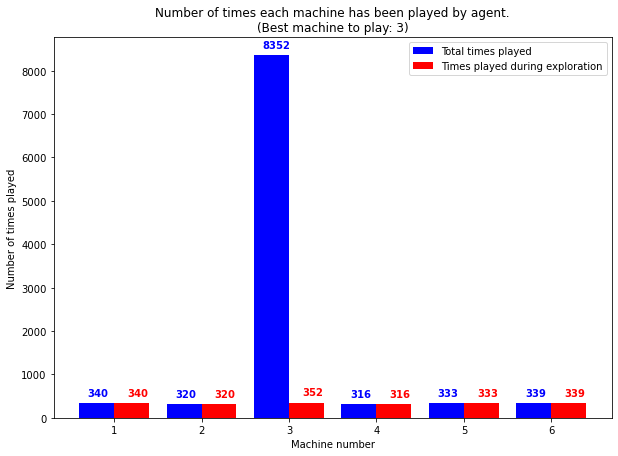

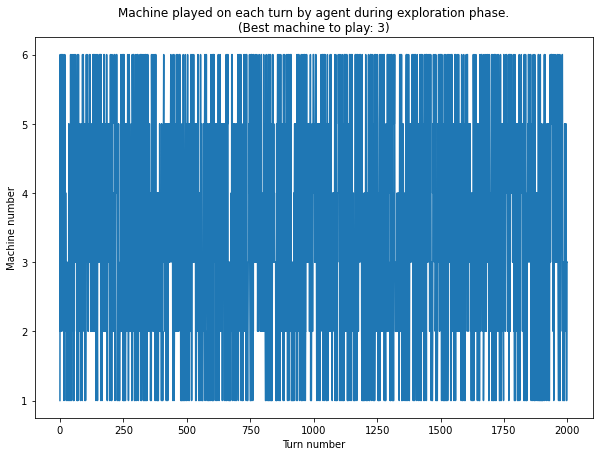

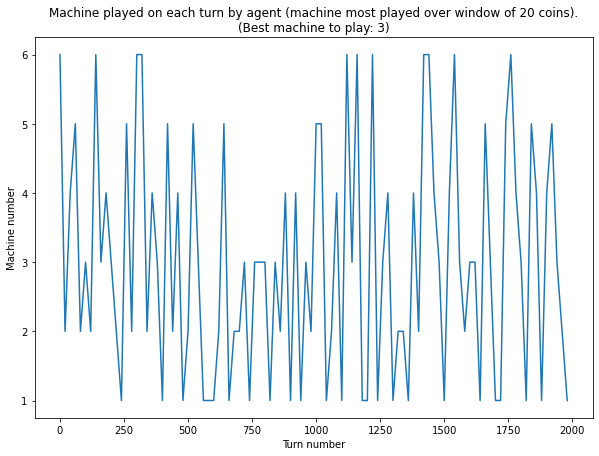

In [13]:
cmg.agent.display_machines_time_played()

The figures below shows the windowed average outcome evolution over the 10000 turns of the game. As expected the first 000 iterations are quite far away from the theoretical best performance (given by the **'prior knowledge'** strategy), but after the exploration phase, the average outcome is close to the expected optimal, as the agent always plays the best machine, i.e. machine 3. This demonstrates that the agent was indeed able to **learn** which machine was best to use during the **exploration** phase, later matching the **upper performance bound** during the **exploitation** phase.

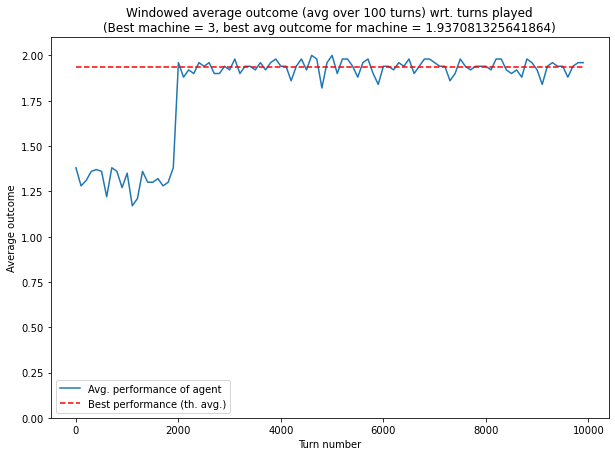

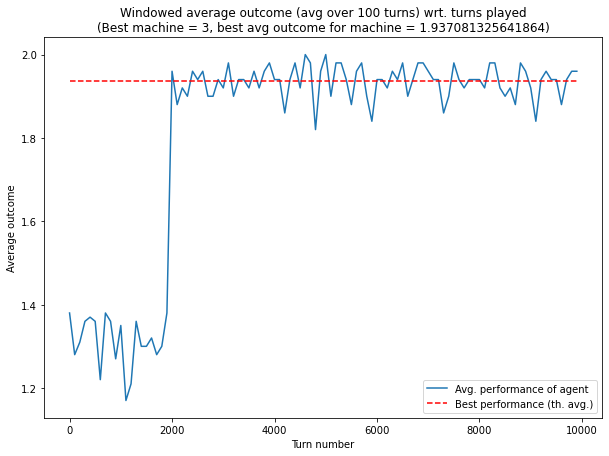

In [14]:
cmg.agent.display_performance_over_time()

Similarly, we could look at the windowed average regret for the strategy. During the **exploration** phase, the regret is high, as expected, as the agent is simply trying out machines at random. Later on, during the **exploitation** phase, the regret falls to values close to zero, meaning the machine was indeed able to **learn** which machine is best to play during the **exploitation** phase.

This regret we experience during the exploration phase corresponds to the **cost of learning**, which machine is best by trial and error. While this **cost of learning** is unavoidable, this gives us new insights on what we are trying to accomplish. Our objective is now to design a strategy that is both able to identify the best machine to play via **exploration**, while minimizing the amount of coins wasted on learning (i.e. the **cost of learning** here).

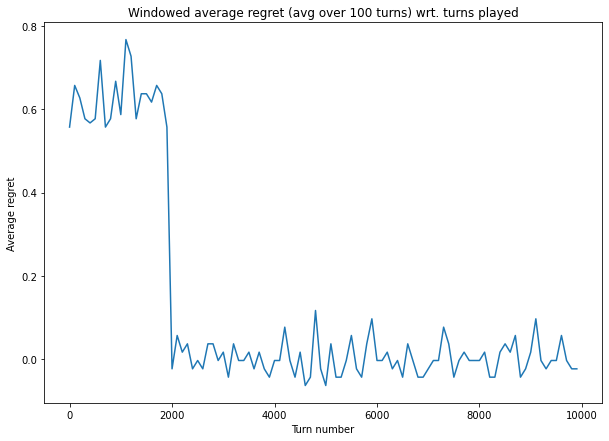

In [15]:
cmg.agent.display_regret_over_time()

For later reference, we will compute and store the outcome and regret of said strategy over all 10000 coins.

In [16]:
# Store average performance and regret
eps_first_naive = cmg.agent.compute_agent_outcome()/playable_money
print(eps_first_naive)
eps_first_naive_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_first_naive_reg)

1.811
0.12608132564188312


### III.2. The epsilon first linear random strategy

The **'epsilon_first_naive'** strategy was able to **learn** which machine shall be played, thanks to an exploration phase. However, this **exploration** was made by playing the machines at random, which does not necessarily make sense. After all, if a machine appears to be bad after a few tries, there is no reason for an agent to keep on trying the said machine. Instead, it should focus on playing the machines with the best estimated rewards, to fine tune its estimation of what the best machine might be.

In this section, we propose to adjust the exploration strategy from a naive random to a linear decision, taking into account the previous iterations of the machine during the exploration phase.

In the following, we will denote $ q_i $, the estimated number of candies that machine $ i $ might return, and we will update this estimate every time machine $ i $ is being played, by taking into account all the previous outcomes we have obtained on this machine.

To do so, we start by initializing the estimates $ q_i $ of all machines $ i \in {1,...,6} $ to $ 1.0 $.
If machine $ i $ is played on turn $ t $, then the new estimate $ q_i $ becomes:

$$ q_i \leftarrow \frac{q_i N_i + r_i(t)}{N_i + 1} $$

With $ N_i $ being the number of time that machine $ i $ has been played so far, and $ r_i(t) $ is the reward obtained on turn $ t $. This formula allows to update the estimate $ q_i $ every time machine $ i $ is played, while reusing the previous values of this estimate (based on the previous tries). 

At the beginning of turn $ t $, the probability of playing machine $ i $ is simply defined as $ P_i $, below:

$$ P_i = \frac{q_i}{\sum_j q_j} $$

This allows the agent to preferably pick machines with higher estimates, and progressively drop the machines with low estimated returns.

Let us now investigate how this **'epsilon_first_linear'** strategy compares to the **'epsilon_first_naive'** strategy, by playing the game with this agent.

In [17]:
# Initialize a CandyMachineGame, with EpsilonFirstLinear
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_first_linear', \
                       agent_parameters = epsilon_value, \
                       random_seed = random_seed)

In [18]:
cmg.play()

Playing 10000 coins with agent epsilon_first: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 170778.55it/s]


The history below shows that, again, the agent is able to identify machine 3 as the best machine to play during the **exploration** phase. 

In [19]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  1              True     1        1  0.937081
1                  3              True     1        2 -0.062919
2                  3              True     1        2 -0.062919
3                  4              True     1        2 -0.062919
4                  5              True     1        0  1.937081
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


From the cell below, we can also see that the estimated return for machine 3 is much more accurate than the one with obtained with the **'epsilon_first_naive'** strategy. this is mostly due to the fact that the agent ends up playing machine 3, more times than during a random naive selection, as it progressively prioritizes machine 3.

In [20]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.73202614379085, 3: 1.9350328947368425, 4: 1.750561797752809, 5: 0.9880000000000002, 6: 0.3026315789473684}


For this reason, it appears that the agent is able to quickly identify machines with low expected returns (such as machine #6), and will not waste as much money testing this machine. This in turn reduces the regret value for the **exploration** phase, leading to higher overall performance for this given strategy compared to the naive random exploration one. Overall the machines that will be played during the exploration phase are the most promising ones, namely machines #2, #3 and #4.

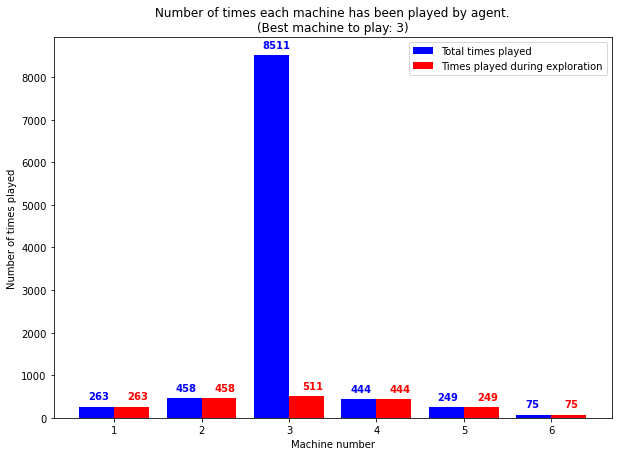

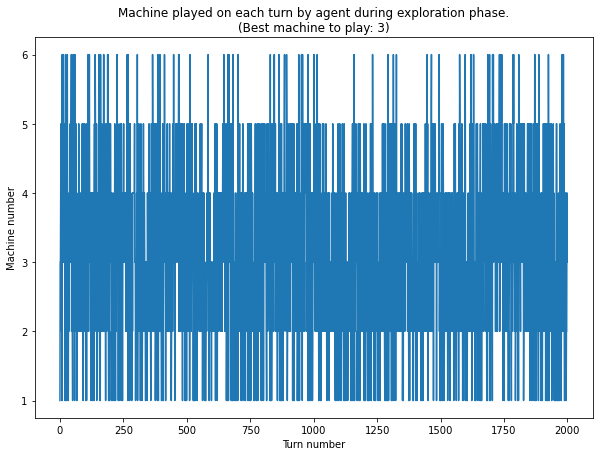

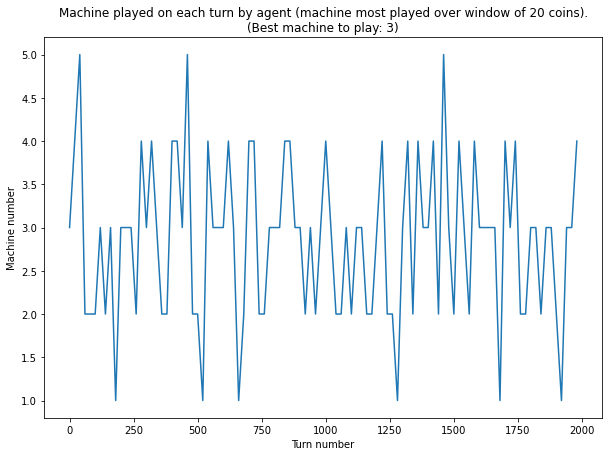

In [21]:
cmg.agent.display_machines_time_played()

As before, we can also display the outcome and regret evolution graphs. They exhibit the same exploration/exploitation behavior that we observed in the **'epsilon_first_naive'** strategy, and also show a slightly better performance in terms of outcomes and regret during the exploration phase.

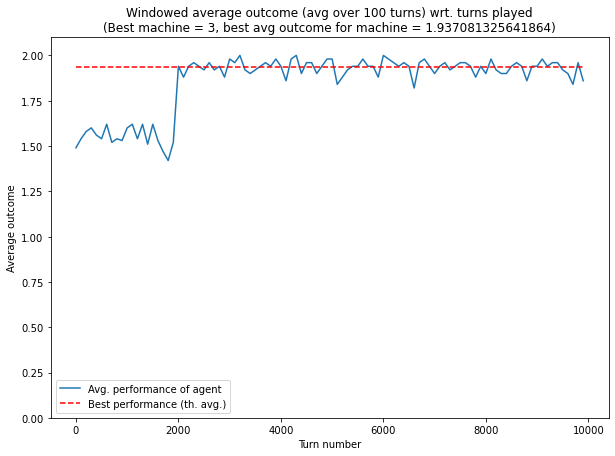

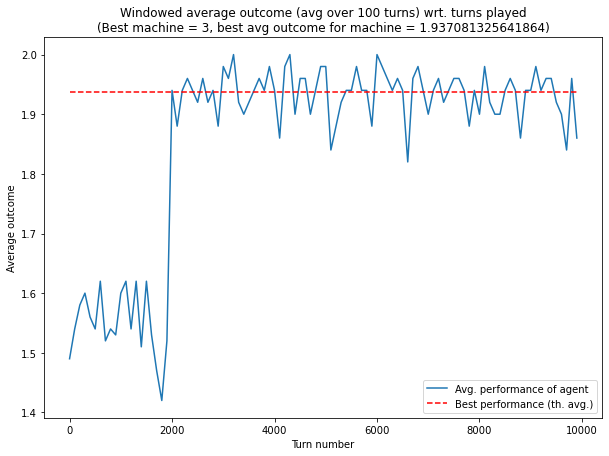

In [22]:
cmg.agent.display_performance_over_time()

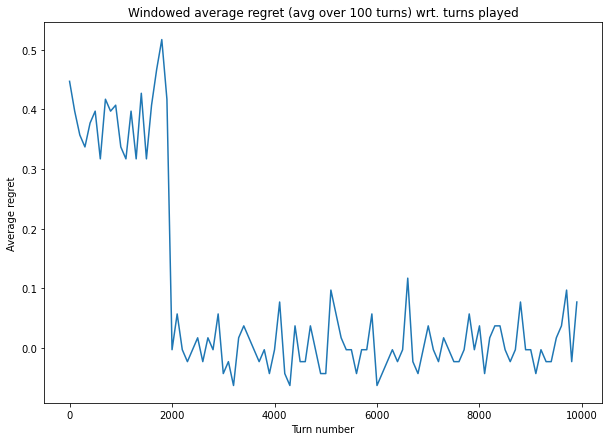

In [23]:
cmg.agent.display_regret_over_time()

As before, we will also store the averaged outcome and regret performance for later comparison. We can already observe a slight performance improvement compared to the **'epsilon_first_naive'** strategy.

In [24]:
# Store average performance and regret
eps_first_linear = cmg.agent.compute_agent_outcome()/playable_money
print(eps_first_linear)
eps_first_linear_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_first_linear_reg)

1.8573
0.07978132564188258


### III.3. The epsilon first softmax random strategy

The **'epsilon_first_softmax'** follows the same idea as the **'epsilon_first_linear'** strategy, which is that the probability of trying machine $ i $ at time $ t $ shall depend on the current estimates and favor the machines with higher estimates. Here, a softmax is used in the probability computation, which tends to favor even more the machines with higher estimates compared to machines with low estimates.

At the beginning of turn $ t $, the probability of playing machine $ i $ is simply defined as $ P_i $, below:

$$ P_i = \frac{\exp(q_i)}{\sum_j \exp(q_j)} $$

The softmax could also be weighted with a weight parameter $ w $ to further accentuate how the probabilities $ P_i $ will favor the machines with higher estimates over the other machines. In the next simulations, we will fix the weight $ w $ to $ 1 $. We leave it to the reader to play with different weights and compare the different behaviors that this strategy exhibits for different values of $ w $!

$$ P_i = \frac{\exp(w q_i)}{\sum_j \exp(w q_j)} $$

Let us now investigate how this **'epsilon_first_softmax'** strategy compares to the **'epsilon_first_naive'** and **'epsilon_first_linear'** strategies, by playing the game with this new agent. The update formula for $ q_i $ remains the same as in the **'epsilon_first_linear'** strategy.

In [25]:
# Initialize a CandyMachineGame, with EpsilonFirstSoftmax
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_first_softmax', \
                       agent_parameters = epsilon_value, \
                       random_seed = random_seed)

In [26]:
cmg.play()

Playing 10000 coins with agent epsilon_first: 100%|████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 123808.32it/s]


As before, the agent is able to correctly identify the best machine (i.e. machine #3) during the **exploration** phase.

In [27]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  1              True     1        1  0.937081
1                  3              True     1        2 -0.062919
2                  3              True     1        2 -0.062919
3                  3              True     1        2 -0.062919
4                  3              True     1        2 -0.062919
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


In [28]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.7481343283582087, 3: 1.9373523788100317, 4: 1.8, 5: 1.2028985507246377, 6: 0.4090909090909091}


However, as shown in the graphs below, the **'epsilon_first_softmax'** agent is able to rapidly eliminate machines #1, #5 and #6, in a much better way than the **'epsilon_first_linear'**.

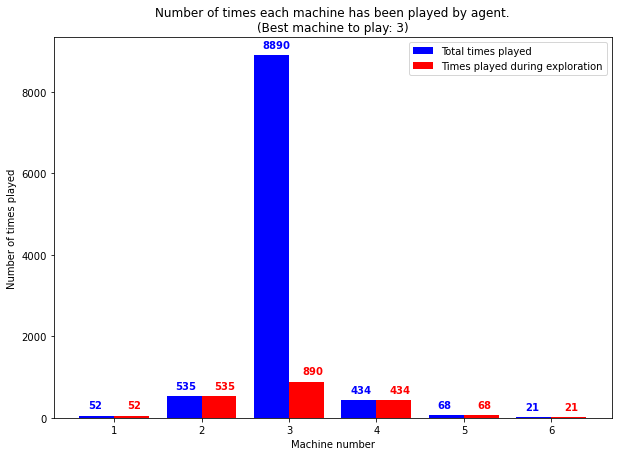

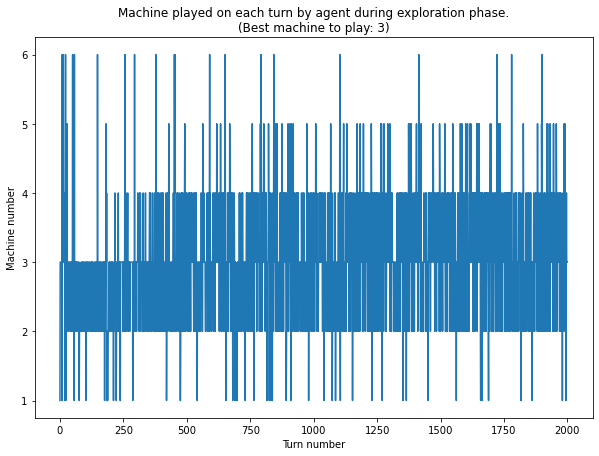

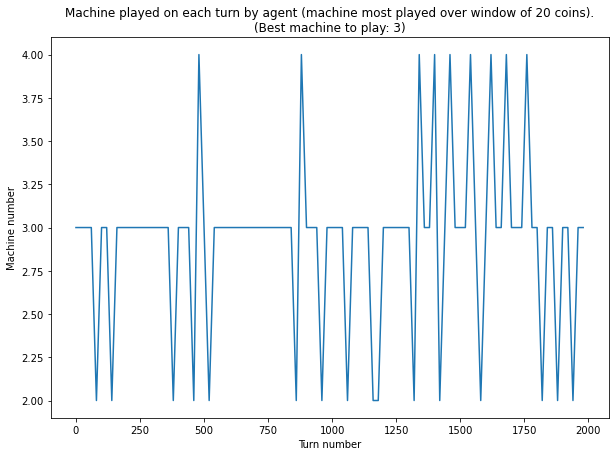

In [29]:
cmg.agent.display_machines_time_played()

As before, we can also display the outcome and regret evolution graphs. They exhibit the same exploration/exploitation behavior that we observed in the **'epsilon_first_naive'** and **'epsilon_first_linear'** strategies, and also show a slightly better performance in terms of outcomes and regret during the exploration phase.

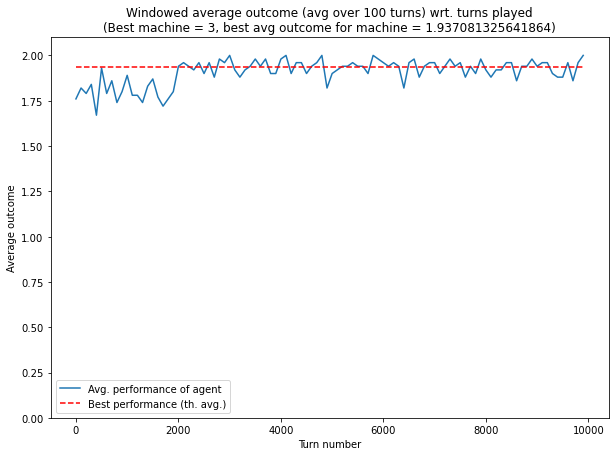

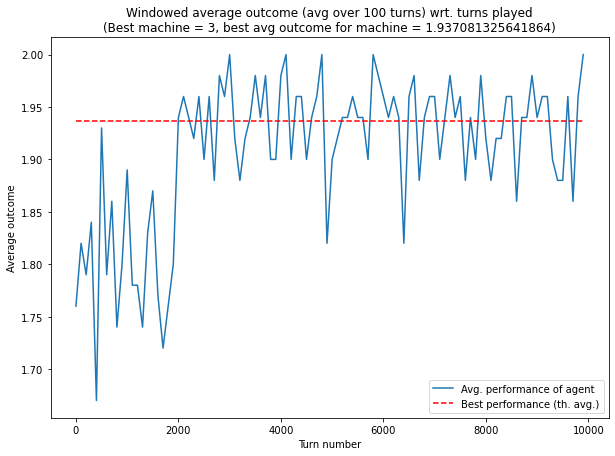

In [30]:
cmg.agent.display_performance_over_time()

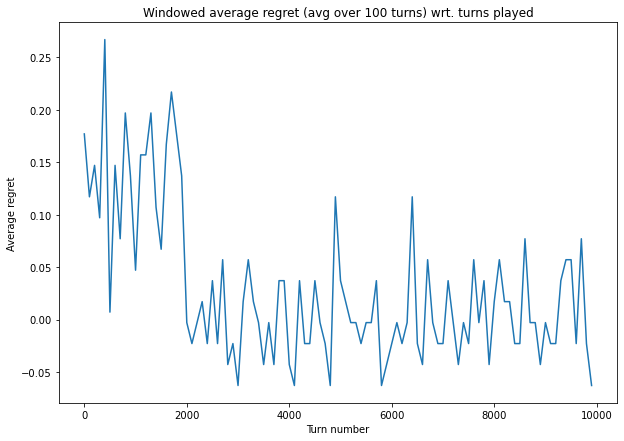

In [31]:
cmg.agent.display_regret_over_time()

As before, we will also store the averaged outcome and regret performance for later comparison.
as expected, we can observe a slight performance improvement compared to the **'epsilon_first_naive'** and **'epsilon_first_linear'** strategies.

In [32]:
# Store average performance and regret
eps_first_softmax = cmg.agent.compute_agent_outcome()/playable_money
print(eps_first_softmax)
eps_first_softmax_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_first_softmax_reg)

1.9084
0.028681325641879942


In fact, if we compare the performance and regret metrics, we will be able to observe how the linear and softmax versions led to improved performance for our strategies.

In [33]:
print("Average performance of each strategy (single run)")
print("(Higher is better.)")
print("---")
print("Random Naive: ", random_naive_avg)
print("---")
print("Prior Knowledge: ", prior_knowledge_avg)
print("---")
print("Epsilon first (naive): ", eps_first_naive)
print("Epsilon first (linear): ", eps_first_linear)
print("Epsilon first (softmax): ", eps_first_softmax)

Average performance of each strategy (single run)
(Higher is better.)
---
Random Naive:  1.3259
---
Prior Knowledge:  1.9372
---
Epsilon first (naive):  1.811
Epsilon first (linear):  1.8573
Epsilon first (softmax):  1.9084


In [34]:
print("Average regret of each strategy (single run)")
print("(Closer to zero is better.)")
print("---")
print("Random Naive: ", random_naive_avg_reg)
print("---")
print("Prior Knowledge: ", prior_knowledge_avg_reg)
print("---")
print("Epsilon first (naive): ", eps_first_naive_reg)
print("Epsilon first (linear): ", eps_first_linear_reg)
print("Epsilon first (softmax): ", eps_first_softmax_reg)

Average regret of each strategy (single run)
(Closer to zero is better.)
---
Random Naive:  0.6111813256418831
---
Prior Knowledge:  -0.00011867435813613893
---
Epsilon first (naive):  0.12608132564188312
Epsilon first (linear):  0.07978132564188258
Epsilon first (softmax):  0.028681325641879942


## IV. A more advanced Exploration/Exploitation based strategy: the epsilon greedy strategies.

In [35]:
epsilon_value = 0.2

### IV.1. The epsilon greedy naive random strategy

In [36]:
# Initialize a CandyMachineGame, with EpsilonGreedy
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_greedy_naive', \
                       agent_parameters = epsilon_value, \
                       random_seed = random_seed)

In [37]:
cmg.play()

Playing 10000 coins with agent epsilon_greedy: 100%|███████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 169944.73it/s]


In [38]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  6              True     1        0  1.937081
1                  1             False     1        1  0.937081
2                  1             False     1        1  0.937081
3                  1             False     1        1  0.937081
4                  6              True     1        0  1.937081
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        0  1.937081
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


In [39]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.788910505836576, 3: 1.9409144504126818, 4: 1.789915966386555, 5: 1.0621301775147927, 6: 0.4156976744186047}


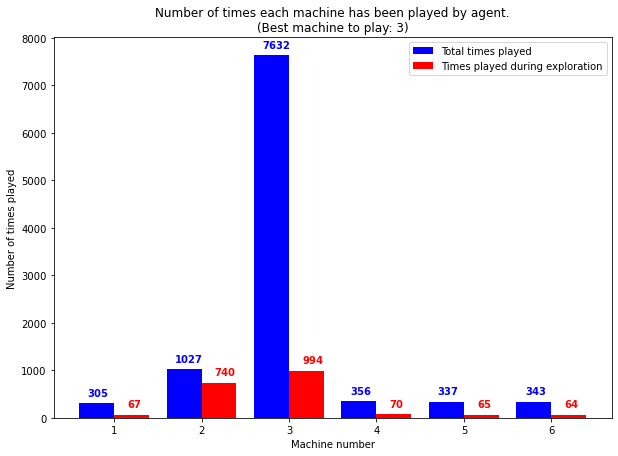

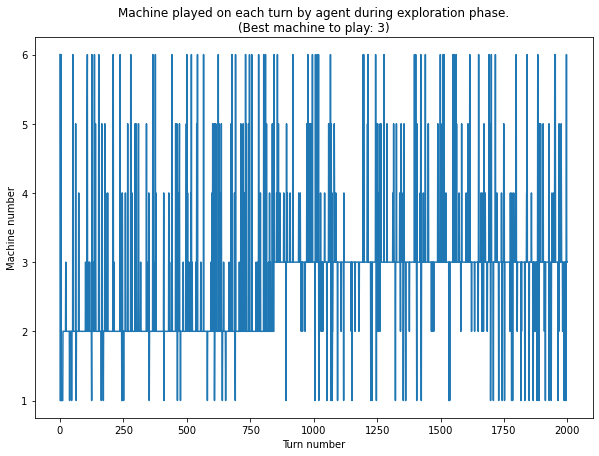

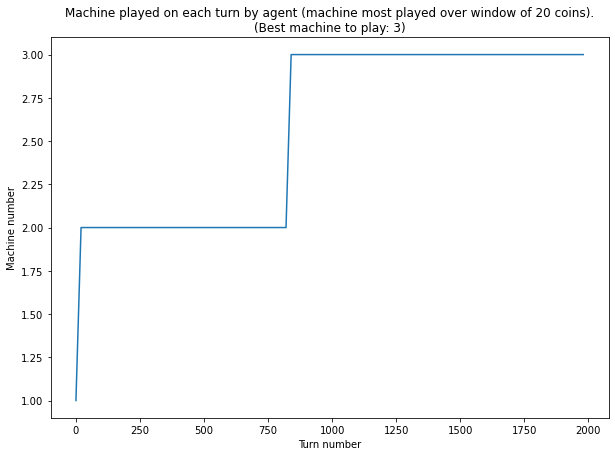

In [40]:
cmg.agent.display_machines_time_played()

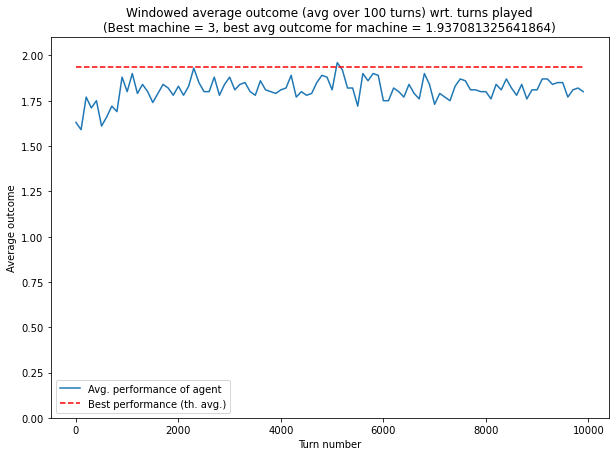

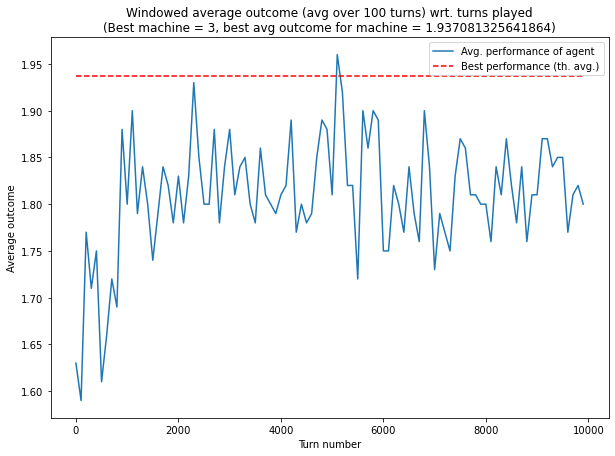

In [41]:
cmg.agent.display_performance_over_time()

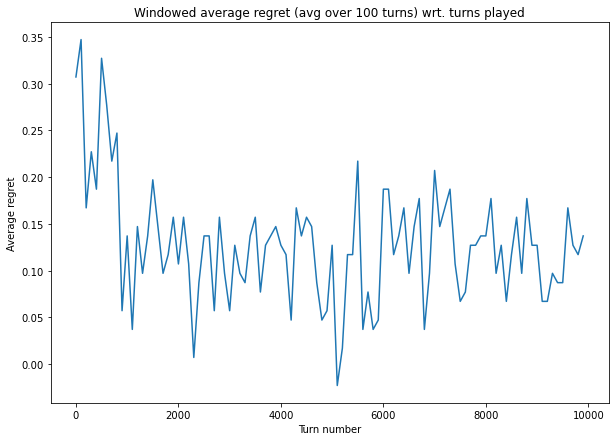

In [42]:
cmg.agent.display_regret_over_time()

In [43]:
# Store average performance and regret
eps_greedy_naive = cmg.agent.compute_agent_outcome()/playable_money
print(eps_greedy_naive)
eps_greedy_naive_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_greedy_naive_reg)

1.8095
0.12758132564188135


### IV.2. The epsilon greedy linear random strategy

In [44]:
# Initialize a CandyMachineGame, with EpsilonGreedy
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_greedy_linear', \
                       agent_parameters = epsilon_value, \
                       random_seed = random_seed)

In [45]:
cmg.play()

Playing 10000 coins with agent epsilon_greedy: 100%|███████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 143174.25it/s]


In [46]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  3              True     1        2 -0.062919
1                  3             False     1        2 -0.062919
2                  3             False     1        2 -0.062919
3                  3             False     1        2 -0.062919
4                  3             False     1        2 -0.062919
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               5              True     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


In [47]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.7804878048780493, 3: 1.9395403653506187, 4: 1.7283653846153841, 5: 1.0229885057471269, 6: 0.6100628930817612}


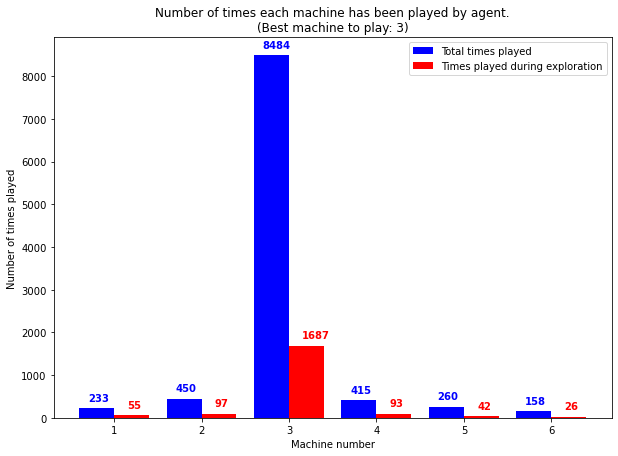

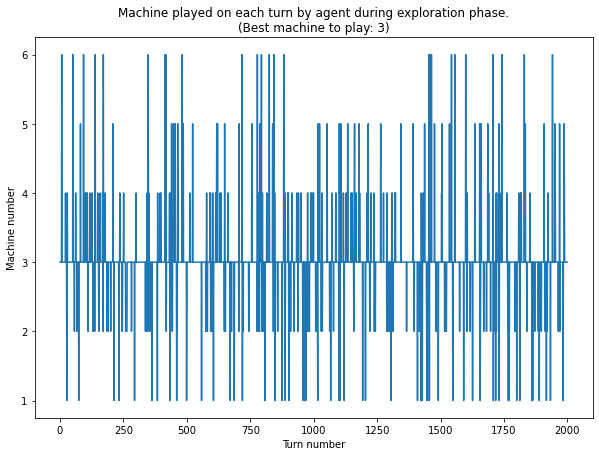

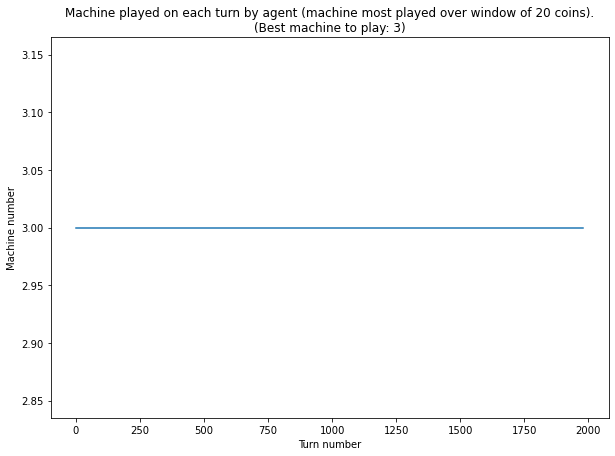

In [48]:
cmg.agent.display_machines_time_played()

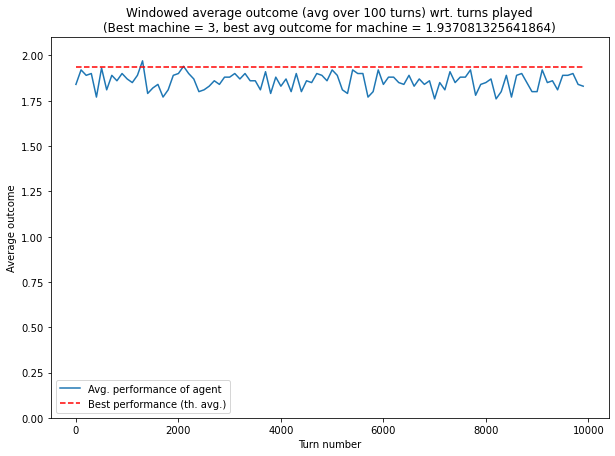

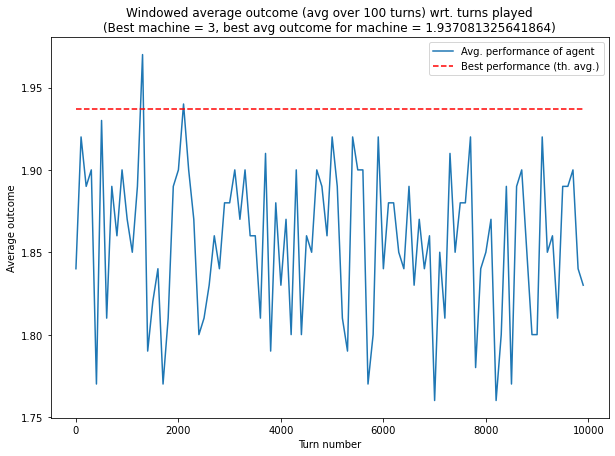

In [49]:
cmg.agent.display_performance_over_time()

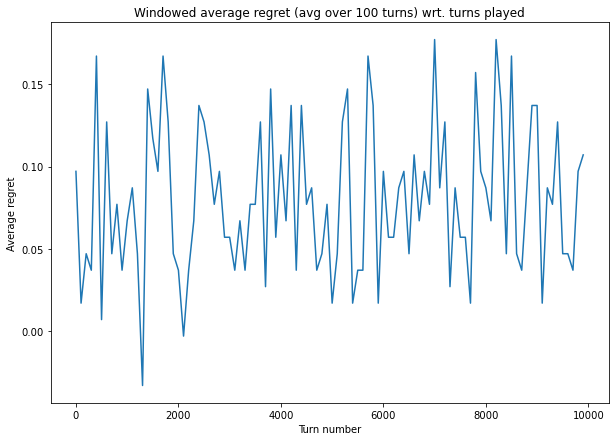

In [50]:
cmg.agent.display_regret_over_time()

In [51]:
# Store average performance and regret
eps_greedy_linear = cmg.agent.compute_agent_outcome()/playable_money
print(eps_greedy_linear)
eps_greedy_linear_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_greedy_linear_reg)

1.8571
0.07998132564187597


### IV.3. The epsilon greedy softmax random strategy

In [52]:
# Initialize a CandyMachineGame, with EpsilonGreedy
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_greedy_softmax', \
                       agent_parameters = epsilon_value, \
                       random_seed = random_seed)

In [53]:
cmg.play()

Playing 10000 coins with agent epsilon_greedy: 100%|███████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 112658.95it/s]


In [54]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  3              True     1        2 -0.062919
1                  3             False     1        2 -0.062919
2                  3             False     1        2 -0.062919
3                  3             False     1        2 -0.062919
4                  3             False     1        2 -0.062919
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               2              True     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


In [55]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.7978260869565217, 3: 1.9394610987985537, 4: 1.7331606217616577, 5: 1.0432900432900427, 6: 0.6089743589743588}


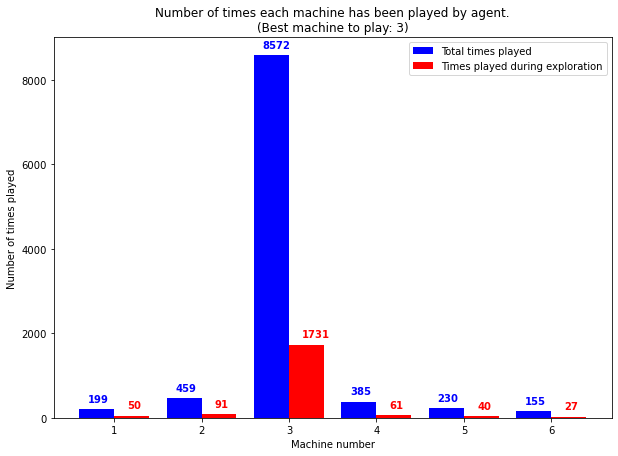

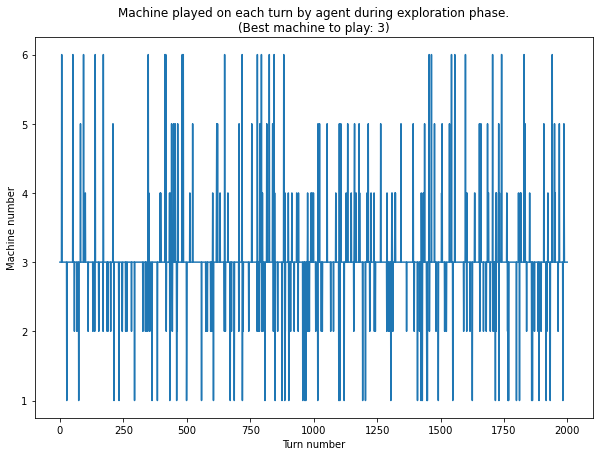

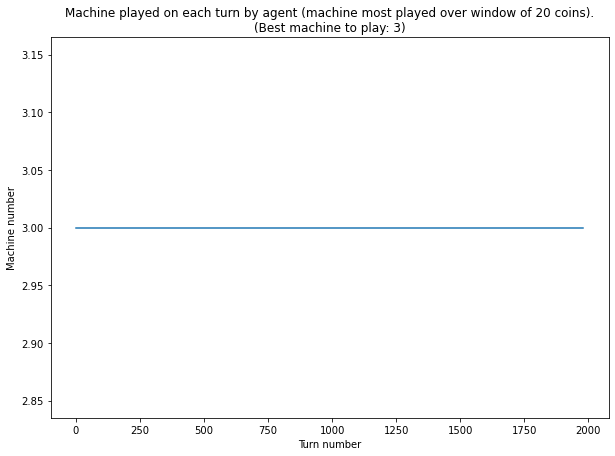

In [56]:
cmg.agent.display_machines_time_played()

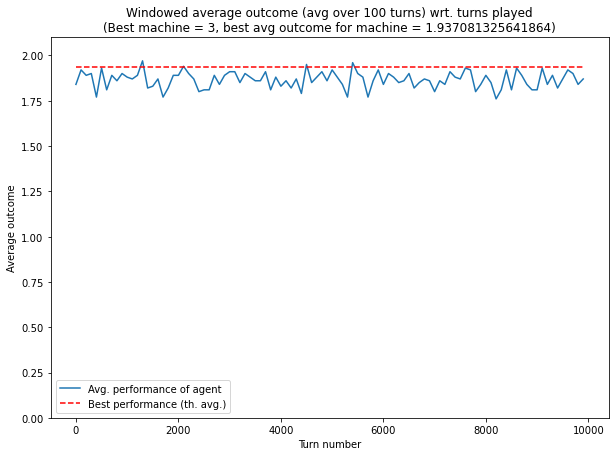

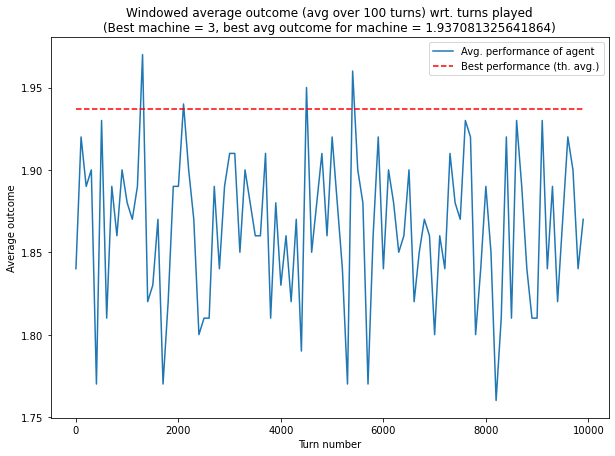

In [57]:
cmg.agent.display_performance_over_time()

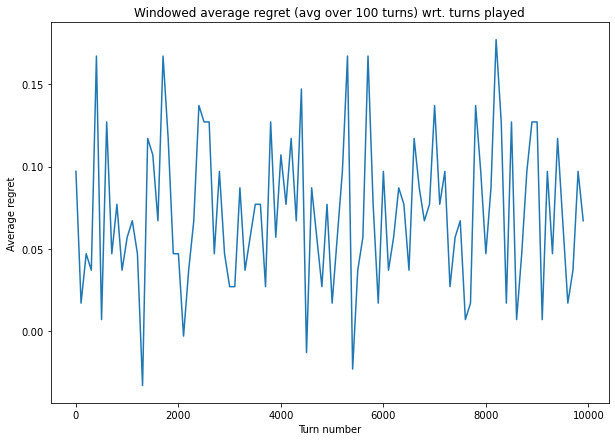

In [58]:
cmg.agent.display_regret_over_time()

In [59]:
# Store average performance and regret
eps_greedy_softmax = cmg.agent.compute_agent_outcome()/playable_money
print(eps_greedy_softmax)
eps_greedy_softmax_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_greedy_softmax_reg)

1.8653
0.0717813256418754


## V. Combining epsilon first and greedy strategies.

In [60]:
epsilon_value1 = 0.025
epsilon_value2 = 0.025
epsilon_values = [epsilon_value1, epsilon_value2]

### V.1. The epsilon first-greedy naive random strategy

In [61]:
# Initialize a CandyMachineGame, with EpsilonFirstGreedy
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_firstgreedy_naive', \
                       agent_parameters = epsilon_values, \
                       random_seed = random_seed)

In [62]:
cmg.play()

Playing 10000 coins with agent epsilon_first_greedy: 100%|█████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 161119.22it/s]


In [63]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  1              True     1        1  0.937081
1                  6              True     1        0  1.937081
2                  2              True     1        2 -0.062919
3                  4              True     1        2 -0.062919
4                  2              True     1        2 -0.062919
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


In [64]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.7960526315789473, 3: 1.9420274661914247, 4: 1.7733333333333334, 5: 1.023529411764706, 6: 0.48148148148148145}


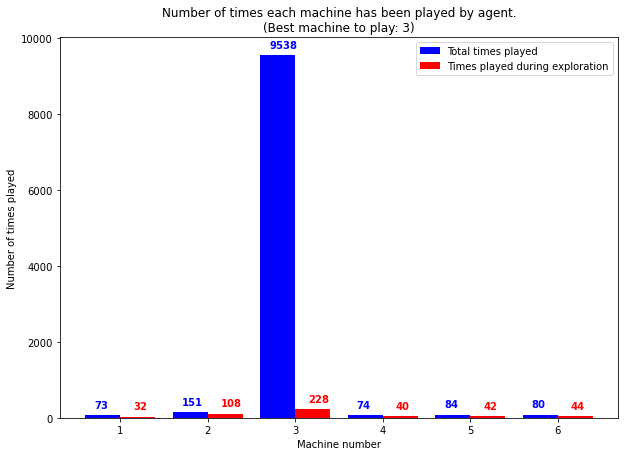

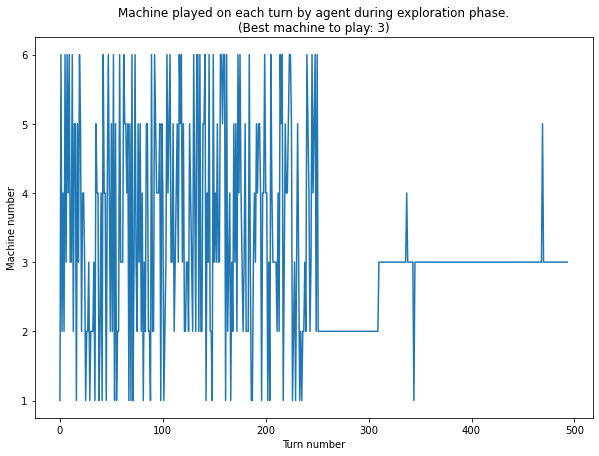

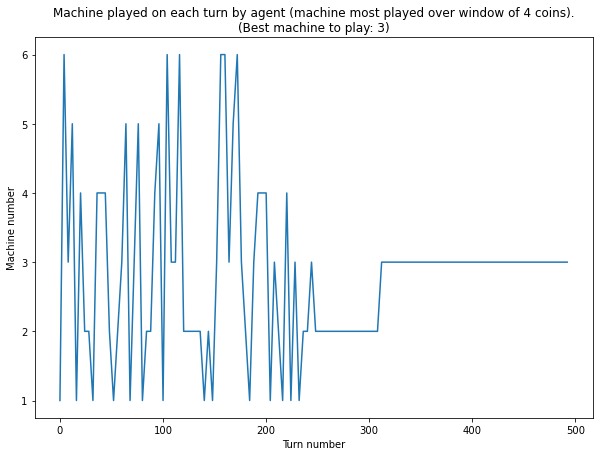

In [65]:
cmg.agent.display_machines_time_played()

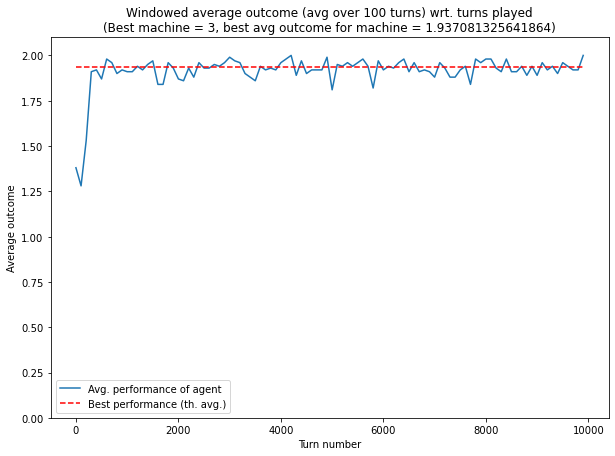

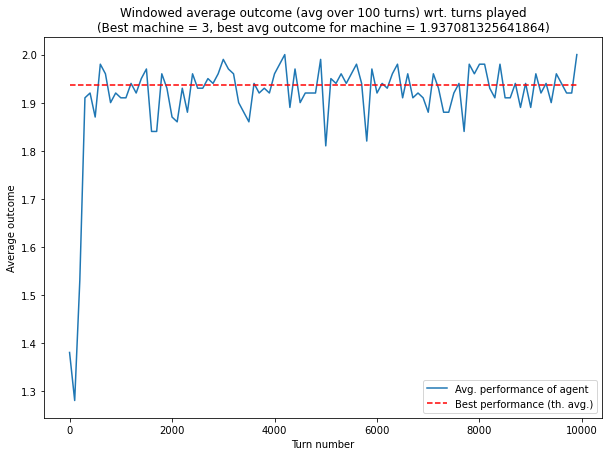

In [66]:
cmg.agent.display_performance_over_time()

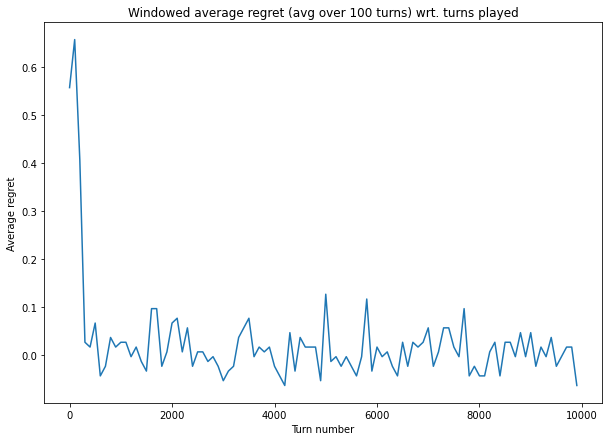

In [67]:
cmg.agent.display_regret_over_time()

In [68]:
# Store average performance and regret
eps_firstgreedy_naive = cmg.agent.compute_agent_outcome()/playable_money
print(eps_firstgreedy_naive)
eps_firstgreedy_naive_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_firstgreedy_naive_reg)

1.9125
0.024581325641855986


### V.2. The epsilon first-greedy linear random strategy

In [69]:
# Initialize a CandyMachineGame, with EpsilonFirstGreedy
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_firstgreedy_linear', \
                       agent_parameters = epsilon_values, \
                       random_seed = random_seed)

In [70]:
cmg.play()

Playing 10000 coins with agent epsilon_first_greedy: 100%|█████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 164373.57it/s]


In [71]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  1              True     1        1  0.937081
1                  3              True     1        2 -0.062919
2                  3              True     1        2 -0.062919
3                  4              True     1        2 -0.062919
4                  5              True     1        0  1.937081
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


In [72]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.8482142857142858, 3: 1.9374416433239967, 4: 1.7105263157894737, 5: 1.0, 6: 0.3103448275862069}


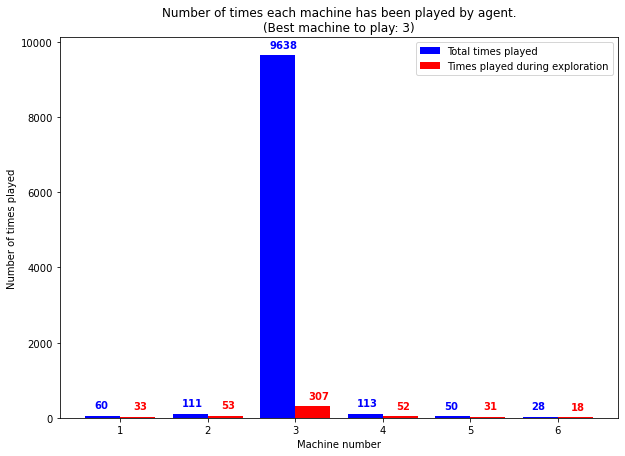

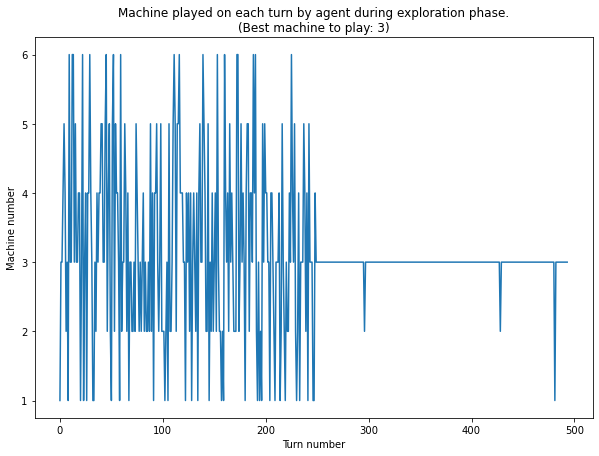

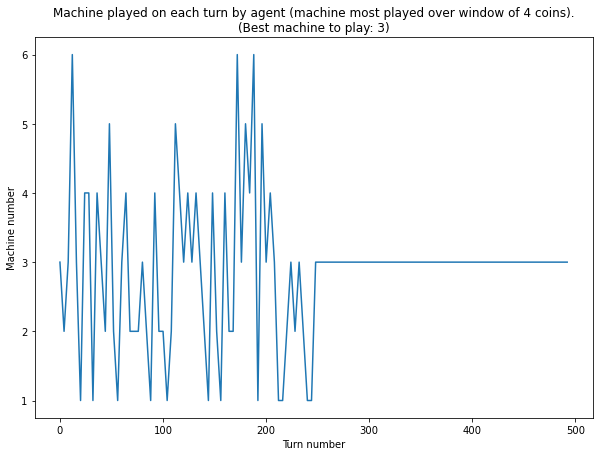

In [73]:
cmg.agent.display_machines_time_played()

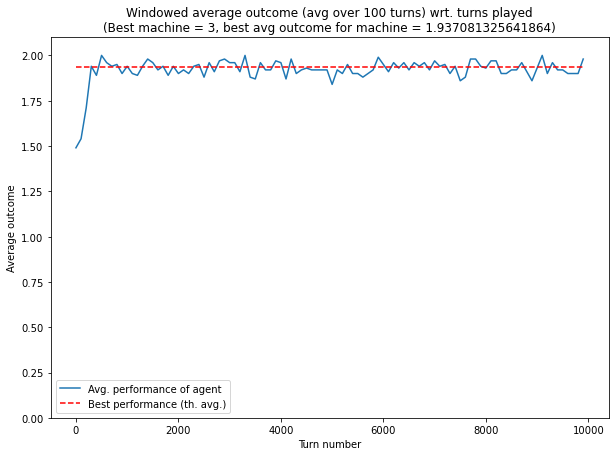

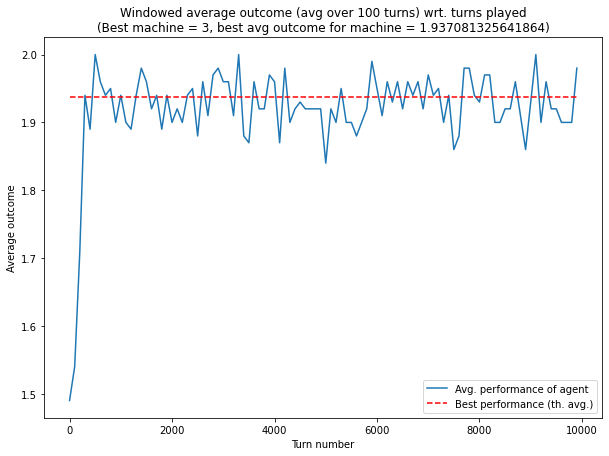

In [74]:
cmg.agent.display_performance_over_time()

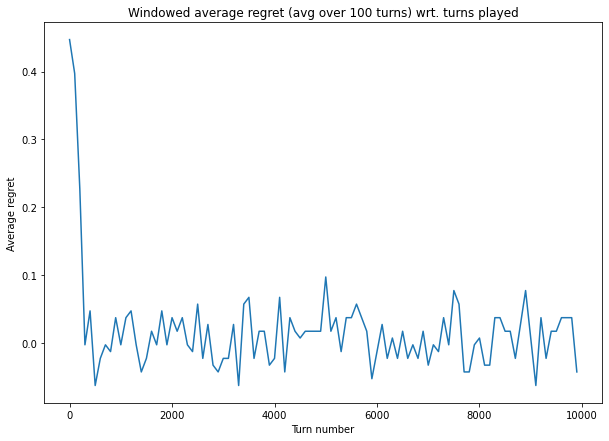

In [75]:
cmg.agent.display_regret_over_time()

In [76]:
# Store average performance and regret
eps_firstgreedy_linear = cmg.agent.compute_agent_outcome()/playable_money
print(eps_firstgreedy_linear)
eps_firstgreedy_linear_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_firstgreedy_linear_reg)

1.9192
0.017881325641862397


### V.3. The epsilon first-greedy softmax random strategy

In [77]:
# Initialize a CandyMachineGame, with EpsilonFirstGreedy
cmg = CandyMachineGame(playable_money = playable_money, \
                       number_of_deterministic_machines = number_of_deterministic_machines, \
                       number_of_random_machines = number_of_random_machines, \
                       machines_cost = machines_cost, \
                       return_prices_for_deterministic_machines = return_prices_for_deterministic_machines, \
                       return_prices_for_random_machines_win = return_prices_for_random_machines_win, \
                       return_prices_for_random_machines_loss = return_prices_for_random_machines_loss, \
                       agent_type = 'epsilon_firstgreedy_softmax', \
                       agent_parameters = epsilon_values, \
                       random_seed = random_seed)

In [78]:
cmg.play()

Playing 10000 coins with agent epsilon_first_greedy: 100%|█████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 154339.10it/s]


In [79]:
cmg.agent.display_history()

      Machine_number  Exploration_play  Cost  Outcome    Regret
0                  1              True     1        1  0.937081
1                  3              True     1        2 -0.062919
2                  3              True     1        2 -0.062919
3                  3              True     1        2 -0.062919
4                  5              True     1        0  1.937081
...              ...               ...   ...      ...       ...
9995               3             False     1        2 -0.062919
9996               3             False     1        2 -0.062919
9997               3             False     1        2 -0.062919
9998               3             False     1        2 -0.062919
9999               3             False     1        2 -0.062919

[10000 rows x 5 columns]


In [80]:
print(cmg.display_machines_list())
print(cmg.agent.machine_estimates)

  Machine_number   Machine_type Cost Return_win Return_loss Win_probability  \
0              1  deterministic    1          1           1               1   
1              2         random    1          2           0        0.873429   
2              3         random    1          2           0        0.968541   
3              4         random    1          2           0        0.869195   
4              5         random    1          2           0        0.530856   
5              6         random    1          2           0        0.232728   

   Expected_return  
0         1.000000  
1         1.746859  
2         1.937081  
3         1.738389  
4         1.061711  
5         0.465457  
None
{1: 1.0, 2: 1.8671875, 3: 1.9371375310687655, 4: 1.6292134831460674, 5: 0.9069767441860465, 6: 0.34375}


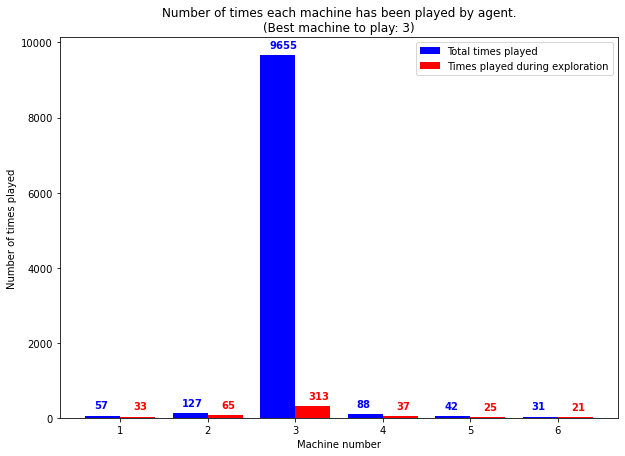

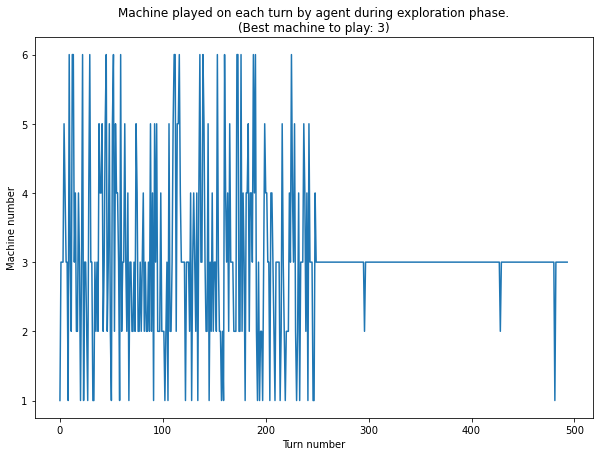

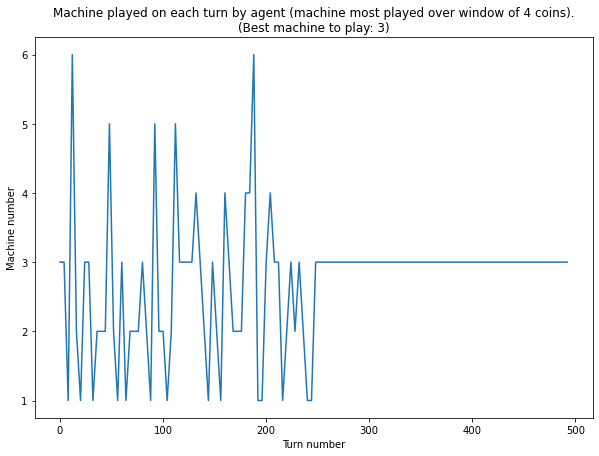

In [81]:
cmg.agent.display_machines_time_played()

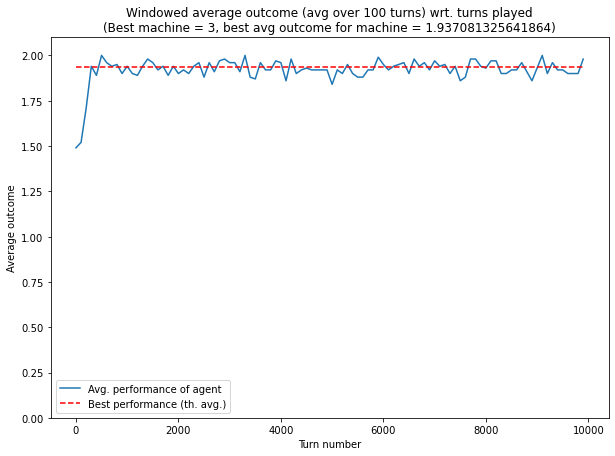

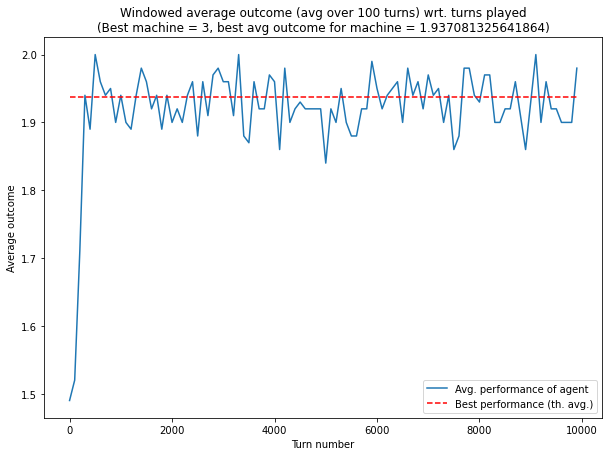

In [82]:
cmg.agent.display_performance_over_time()

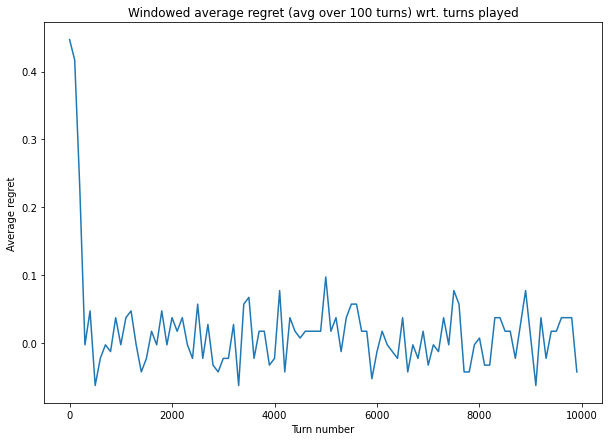

In [83]:
cmg.agent.display_regret_over_time()

In [84]:
# Store average performance and regret
eps_firstgreedy_softmax = cmg.agent.compute_agent_outcome()/playable_money
print(eps_firstgreedy_softmax)
eps_firstgreedy_softmax_reg = cmg.agent.compute_agent_regret()/playable_money
print(eps_firstgreedy_softmax_reg)

1.9191
0.017981325641862157


## VI. Performance comparison of strategies

In [85]:
print("Average performance of each strategy (single run)")
print("(Higher is better.)")
print("---")
print("Random (naive): ", random_naive_avg)
print("---")
print("Prior Knowledge: ", prior_knowledge_avg)
print("---")
print("Epsilon first (naive): ", eps_first_naive)
print("Epsilon first (linear): ", eps_first_linear)
print("Epsilon first (softmax): ", eps_first_softmax)
print("---")
print("Epsilon greedy (naive): ", eps_greedy_naive)
print("Epsilon greedy (linear): ", eps_greedy_linear)
print("Epsilon greedy (softmax): ", eps_greedy_softmax)
print("---")
print("Epsilon first-greedy (naive): ", eps_firstgreedy_naive)
print("Epsilon first-greedy (linear): ", eps_firstgreedy_linear)
print("Epsilon first-greedy (softmax): ", eps_firstgreedy_softmax)

Average performance of each strategy (single run)
(Higher is better.)
---
Random (naive):  1.3259
---
Prior Knowledge:  1.9372
---
Epsilon first (naive):  1.811
Epsilon first (linear):  1.8573
Epsilon first (softmax):  1.9084
---
Epsilon greedy (naive):  1.8095
Epsilon greedy (linear):  1.8571
Epsilon greedy (softmax):  1.8653
---
Epsilon first-greedy (naive):  1.9125
Epsilon first-greedy (linear):  1.9192
Epsilon first-greedy (softmax):  1.9191


In [86]:
print("Average regret of each strategy (single run)")
print("(Closer to zero is better.)")
print("---")
print("Random (naive): ", random_naive_avg_reg)
print("---")
print("Prior Knowledge: ", prior_knowledge_avg_reg)
print("---")
print("Epsilon first (naive): ", eps_first_naive_reg)
print("Epsilon first (linear): ", eps_first_linear_reg)
print("Epsilon first (softmax): ", eps_first_softmax_reg)
print("---")
print("Epsilon greedy (naive): ", eps_greedy_naive_reg)
print("Epsilon greedy (linear): ", eps_greedy_linear_reg)
print("Epsilon greedy (softmax): ", eps_greedy_softmax_reg)
print("---")
print("Epsilon first-greedy (naive): ", eps_firstgreedy_naive_reg)
print("Epsilon first-greedy (linear): ", eps_firstgreedy_linear_reg)
print("Epsilon first-greedy (softmax): ", eps_firstgreedy_softmax_reg)

Average regret of each strategy (single run)
(Closer to zero is better.)
---
Random (naive):  0.6111813256418831
---
Prior Knowledge:  -0.00011867435813613893
---
Epsilon first (naive):  0.12608132564188312
Epsilon first (linear):  0.07978132564188258
Epsilon first (softmax):  0.028681325641879942
---
Epsilon greedy (naive):  0.12758132564188135
Epsilon greedy (linear):  0.07998132564187597
Epsilon greedy (softmax):  0.0717813256418754
---
Epsilon first-greedy (naive):  0.024581325641855986
Epsilon first-greedy (linear):  0.017881325641862397
Epsilon first-greedy (softmax):  0.017981325641862157


## VII. End of file

In this notebook, we have introduced three reference strategies, which are able to learn from previous iterations, namely: the epsilon-first, epsilon-greedy and epsilon-firstgreedy strategies. These strategies show interesting performance gains and are able to quickly identify the best machine to play during their exploration phase, and later on exploit the machine during a second phase. 